In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'agg.csv',sep=',')

In [3]:
df

,Complaint Date,Total
0,01-01-2018,19
1,02-01-2018,0
2,03-01-2018,44
3,04-01-2018,27
4,05-01-2018,1
...,...,...
1091,27-12-2020,47
1092,28-12-2020,109
1093,29-12-2020,83
1094,30-12-2020,74


In [4]:
df['Complaint Date'] = pd.to_datetime(df['Complaint Date'])

In [5]:
df.dtypes #Checking the datatype of the ComplaintDate column

Complaint Date    datetime64[ns]
Total                      int64
dtype: object

### FBPROPHET

In [6]:
from fbprophet import Prophet

In [7]:
df.columns = ['ds','y'] #changing the column names because fbprophet takes date column as ds and dependent variable that is to be predicted as y

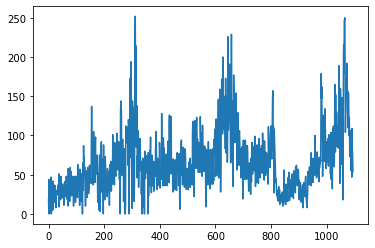

In [8]:
df['y'].plot()

In [9]:
m = Prophet(interval_width=0.95)
m.fit(df)
future = m.make_future_dataframe(periods=180)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
forecast = m.predict(future)

,ds,yhat,yhat_lower,yhat_upper
1246,2021-05-31,65.637117,0.653833,130.921475
1247,2021-06-01,66.354956,-1.485301,128.022766
1248,2021-06-02,64.605596,0.116739,130.945796
1249,2021-06-03,59.715452,-6.612503,124.907144
1250,2021-06-04,59.107996,-11.212877,129.253042
1251,2021-06-05,58.065812,-8.529007,128.266713
1252,2021-06-06,51.634761,-13.399455,117.118382
1253,2021-06-07,70.182418,5.564290,143.035290
1254,2021-06-08,70.574396,6.128652,139.022004
1255,2021-06-09,68.499110,1.992366,127.176924


In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,44.300914,-18.009146,115.040556,44.300914,44.300914,1.270758,1.270758,1.270758,7.043210,7.043210,7.043210,-5.772452,-5.772452,-5.772452,0.0,0.0,0.0,45.571672
1,2018-01-02,44.363502,-24.618931,113.038233,44.363502,44.363502,1.422965,1.422965,1.422965,6.974504,6.974504,6.974504,-5.551539,-5.551539,-5.551539,0.0,0.0,0.0,45.786467
2,2018-01-03,44.426091,-18.400365,115.645016,44.426091,44.426091,-0.888110,-0.888110,-0.888110,4.479179,4.479179,4.479179,-5.367288,-5.367288,-5.367288,0.0,0.0,0.0,43.537981
3,2018-01-04,44.488680,-27.109874,103.044042,44.488680,44.488680,-6.346605,-6.346605,-6.346605,-1.111464,-1.111464,-1.111464,-5.235141,-5.235141,-5.235141,0.0,0.0,0.0,38.142075
4,2018-01-05,44.551268,-27.029643,101.146588,44.551268,44.551268,-7.538698,-7.538698,-7.538698,-2.370913,-2.370913,-2.370913,-5.167785,-5.167785,-5.167785,0.0,0.0,0.0,37.012570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2021-06-25,69.212367,0.997775,127.610858,67.100680,71.593985,-4.213887,-4.213887,-4.213887,-2.370913,-2.370913,-2.370913,-1.842974,-1.842974,-1.842974,0.0,0.0,0.0,64.998480
1272,2021-06-26,69.207227,-5.419599,133.553272,67.082386,71.609379,-5.959156,-5.959156,-5.959156,-4.015319,-4.015319,-4.015319,-1.943837,-1.943837,-1.943837,0.0,0.0,0.0,63.248071
1273,2021-06-27,69.202088,-8.704275,126.209808,67.064485,71.624772,-13.120441,-13.120441,-13.120441,-10.999197,-10.999197,-10.999197,-2.121244,-2.121244,-2.121244,0.0,0.0,0.0,56.081647
1274,2021-06-28,69.196948,4.862612,139.558448,67.046584,71.636962,4.660883,4.660883,4.660883,7.043210,7.043210,7.043210,-2.382326,-2.382326,-2.382326,0.0,0.0,0.0,73.857831


In [12]:
#Extracting the required columns from the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
1246,2021-05-31,65.637117,0.653833,130.921475
1247,2021-06-01,66.354956,-1.485301,128.022766
1248,2021-06-02,64.605596,0.116739,130.945796
1249,2021-06-03,59.715452,-6.612503,124.907144
1250,2021-06-04,59.107996,-11.212877,129.253042
1251,2021-06-05,58.065812,-8.529007,128.266713
1252,2021-06-06,51.634761,-13.399455,117.118382
1253,2021-06-07,70.182418,5.564290,143.035290
1254,2021-06-08,70.574396,6.128652,139.022004
1255,2021-06-09,68.499110,1.992366,127.176924


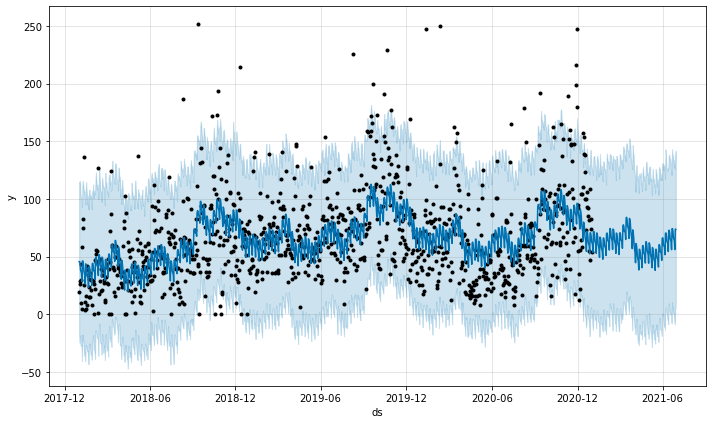

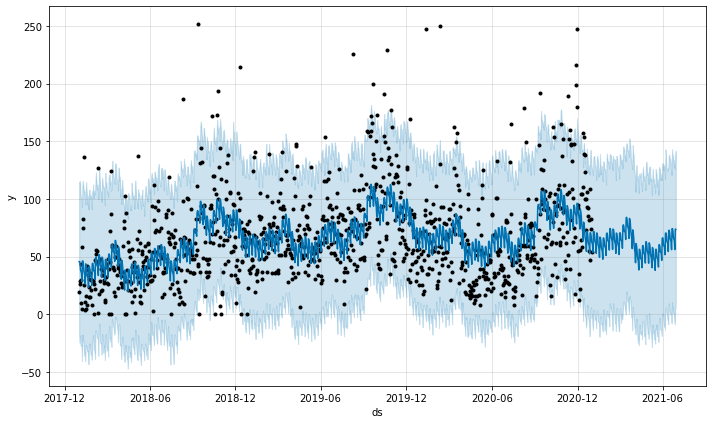

In [13]:
m.plot(forecast)

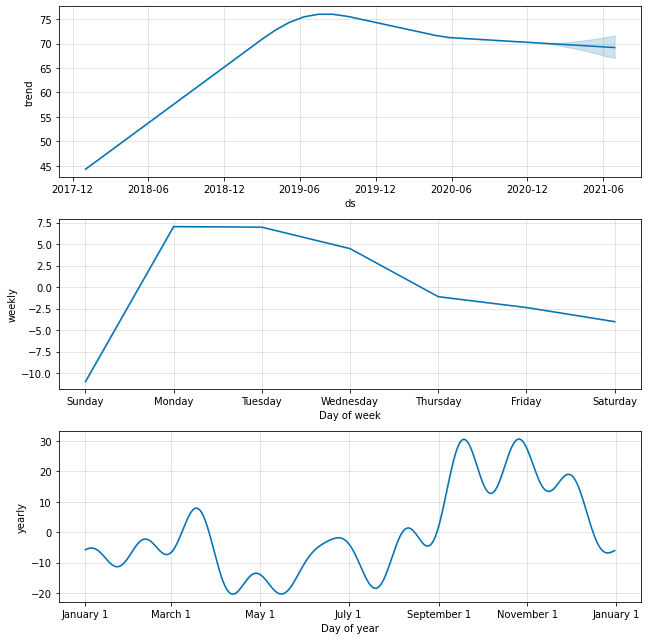

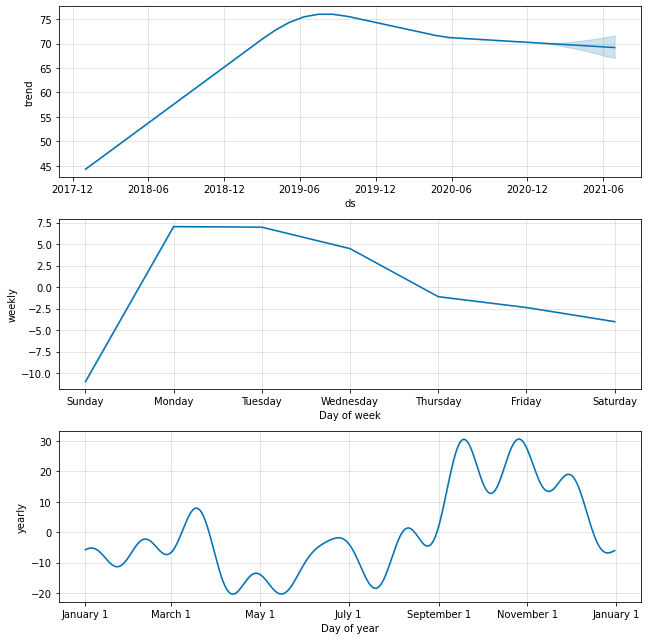

In [14]:
m.plot_components(forecast)

In [15]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m,initial='730 days', period='180 days',horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-02,73.837333,14.964518,129.040003,52,2020-01-01
1,2020-01-03,72.780295,14.746232,132.452556,38,2020-01-01
2,2020-01-04,73.731382,11.303432,135.424040,25,2020-01-01
3,2020-01-05,64.976022,4.459472,125.317997,18,2020-01-01
4,2020-01-06,84.875344,24.230682,144.280997,55,2020-01-01


In [16]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,1785.265730,42.252405,28.466553,0.699655,0.391061,0.888889
1,37 days,1842.799292,42.927838,29.262141,0.736341,0.391061,0.888889
2,38 days,1862.941554,43.161807,29.517862,0.744857,0.391061,0.888889
3,39 days,1800.863756,42.436585,28.492821,0.696280,0.353217,0.888889
4,40 days,1741.076904,41.726214,27.392848,0.626255,0.316571,0.888889


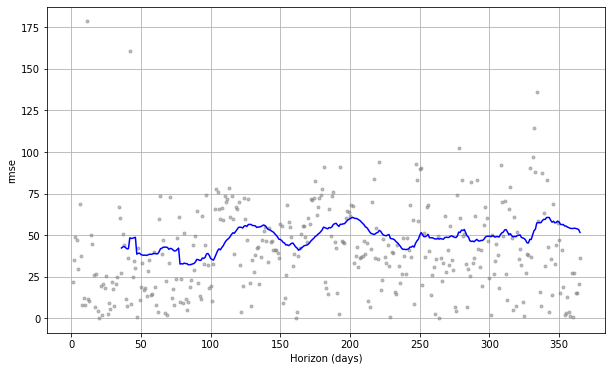

In [17]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')